# Analysis of Global YouTube Statistics
## Summer 2024 Data Science Project
### Team Members: Jay Desai, Daniel Deutsch, Aryan Choudhary


### Introduction





Over the years, YouTube has established itself as a hub for content creators, enabling them to share their videos and connect with audiences on a global scale. The platform's reach is unparalleled, with millions of channels across the world offering content across all types of genres for billions of users. For content creators, marketers, and analysts, understanding the factors that influence video views and earnings is crucial. This knowledge can help content creators tailor their content to attract and retain viewers, optimize their engagement, and ultimately maximize their revenue.

The main goal of this project is to explore the relationship between YouTube video views, earnings, and various channel categories across different countries. We aim to understand if there is a significant difference in views based on the category of content and whether location impacts these metrics. By analyzing this data, we can provide insights into how content creators can optimize their channels for better engagement and monetization.

### Data Curation

In this section, we will look for a dataset that is relevant to our topic. Luckily, we can find one on Kaggle with a link to the source [here](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023). Listed below are the library imports that are necessary for our tutorial.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Below is the dataframe for our dataset.

In [ ]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding = 'latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### Exploratory Data Analysis

We can begin our exploratory data analysis by listing all of the features in our dataset.

In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

We also want to calculate the number of features and entries in the dataset using statistics.shape. We can then generate descriptive statistics by calling the describe function, which provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.

In [ ]:
# Number of features and entries
num_features = df.shape[1]
num_entries = df.shape[0]
print(f"Number of features: {num_features}, Number of entries: {num_entries}")

# Descriptive statistics
df.describe()

Number of features: 28, Number of entries: 995


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


From the information above, we see that there are 28 columns. Three of the columns are *created_year*, *created_month*, and *created_date* respectively. We can combine these three columns into one simply called *date* in datetime format.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

pd.options.mode.copy_on_write = False
df = df.dropna(subset=["created_year", "created_month", "created_date"])
df['year'] = df['created_year'].astype(int).astype(str)
df['month'] = df['created_month']
df['day'] = df['created_date'].astype(int).astype(str)

df = df.dropna(subset = ['year', 'month', 'day'])
df['date'] = pd.to_datetime(df['year'] + ' ' + df['month'] + ' ' + df['day'])

df = df.drop(columns = ['created_year', 'year', 'created_month', 'month', 'created_date', 'day'])

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,date
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,6800000.00,1.084000e+08,2000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.04,5.800000e-01,NaN,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,4000000.00,6.470000e+07,8000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,5900000.00,9.480000e+07,1000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,5500000.00,8.750000e+07,1000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2006-09-20


As the information displays, the columns have been merged into one datetime format column called *date*.

In [ ]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    120
Abbreviation                               120
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
Gross tertiary education enrollment (%)    121
Population                                 121
Unemployment 

We can choose one of the columns to fill in the missing data to be based from the other columns using a standard regression method. We can try doing this with the *video_views_for_the_last_30_days* column.

In [ ]:
# For our regression method, we will use a standard linear regression model from sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# We can separate the data into rows that are filled vs rows that are null
train = df[df['video_views_for_the_last_30_days'].notnull()]
test = df[df['video_views_for_the_last_30_days'].isnull()]

# Let's train the target column on the 'video views' and 'uploads' columns
model.fit(train[['video views', 'uploads']], train[['video_views_for_the_last_30_days']])
predicted = model.predict(test[['video views', 'uploads']])

# Outputting first 10 of the predicted values
predicted[:10]

array([[5.54230579e+07],
       [5.54230579e+07],
       [1.64980591e+08],
       [1.44129495e+08],
       [5.54230579e+07],
       [2.73405075e+08],
       [1.59666649e+08],
       [2.10694452e+08],
       [2.10926375e+08],
       [1.29878109e+08]])

Now that we have gotten the predicted values, we can replace the null rows with these values. We can check the number of null values in each column to confirm that the model has replaced them with the predicted values.

In [ ]:
df.loc[df['video_views_for_the_last_30_days'].isnull(), 'video_views_for_the_last_30_days'] = predicted
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    120
Abbreviation                               120
channel_type                                27
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
Gross tertiary education enrollment (%)    121
Population                                 121
Unemployment 

The *video_views_for_the_last_30_days* column shows 0 null values which confirms the model worked.

We can group the data by category and country to calculate the mean video views for each category, both for non-USA and USA data. This helps us understand how viewership varies by content category and geography.

In [ ]:
# Non-USA Views by Category
print(f"Non-USA Views by Category: \n{df[df['Country'] != 'United States'].groupby('category')['video views'].mean().sort_values(ascending=False)}")

# USA Views by Category
print(f"USA Views by Category: \n{df[df['Country'] == 'United States'].groupby('category')['video views'].mean().sort_values(ascending=False)}")

Non-USA Views by Category: 
category
Shows                    4.204793e+10
Trailers                 1.663136e+10
Music                    1.646766e+10
Film & Animation         1.134378e+10
Education                1.107436e+10
News & Politics          1.035546e+10
Entertainment            1.032330e+10
Pets & Animals           9.824589e+09
People & Blogs           9.271109e+09
Movies                   7.691628e+09
Autos & Vehicles         7.501729e+09
Gaming                   7.447880e+09
Comedy                   6.763613e+09
Sports                   5.434440e+09
Howto & Style            5.305270e+09
Science & Technology     3.654583e+09
Nonprofits & Activism    3.523579e+09
Travel & Events          3.140883e+09
Name: video views, dtype: float64
USA Views by Category: 
category
Sports                   2.307593e+10
Education                2.273721e+10
Shows                    1.694386e+10
Music                    1.386470e+10
Film & Animation         1.322784e+10
Pets & Animals        

We can see above that Sports is the most popular category in the US by views, and Shows are the most popular outside the US.

Many of the columns are highly correlated to subscribers, as shows below. Our model will need to acount for to avoid giving too much importance to any correlated category.

Subscribers Correlation Matrix: 
subscribers                                1.000000
video views                                0.750822
lowest_yearly_earnings                     0.388722
lowest_monthly_earnings                    0.388590
highest_yearly_earnings                    0.388585
highest_monthly_earnings                   0.388228
subscribers_for_last_30_days               0.309527
video_views_for_the_last_30_days           0.269284
Urban_population                           0.083212
Population                                 0.081634
uploads                                    0.076788
video_views_rank                           0.060161
country_rank                               0.039531
channel_type_rank                          0.029294
Longitude                                  0.022331
Latitude                                   0.017913
Gross tertiary education enrollment (%)   -0.005919
Unemployment rate                         -0.007628
rank                           

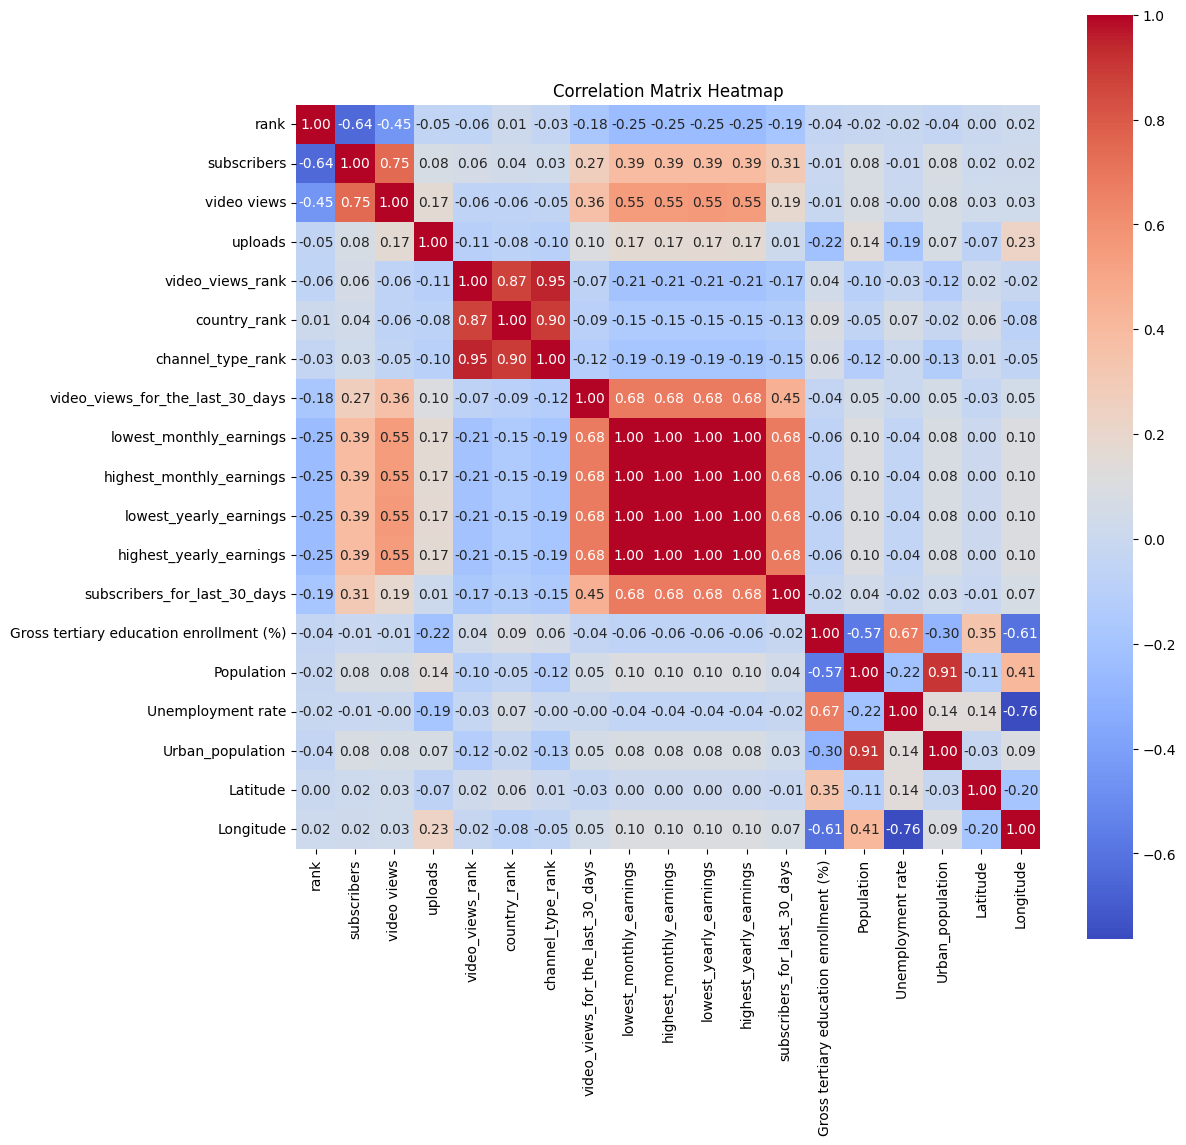

In [ ]:
subs_corr = df.corr(numeric_only=True)['subscribers'].sort_values(ascending=False)
views_corr = df.corr(numeric_only=True)['video views'].sort_values(ascending=False)
print(f"Subscribers Correlation Matrix: \n{subs_corr}")
print(f"Viewers Correlation Matrix: \n{views_corr}")
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Correlation Analysis
Next, we are going to do correlation analysis. We want to examine the relationship between the most important variables in our dataset. In this case, examining the relationship between these variables can help us determine the most important factors related to video views, subscribers and earnings.

##### Calculate Median Monthly Earnings
To do this, we first calculate the median of lowest_monthly_earnings and highest_monthly_earnings for each row in our dataframe by applying the median() function. The resulting median values are then stored in a new column named median_monthly_earnings.


In [ ]:
df['median_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].median(axis=1)

##### Calculate Correlation Matrix
Next, we create a correlation matrix for the columns median_monthly_earnings, subscribers, and video views using the corr() function.

In [ ]:
correlation_earnings = df[['median_monthly_earnings', 'subscribers', 'video views']].corr()

##### Plot Correlation Matrix
Finally, we create a heatmap to visualize the correlation matrix.

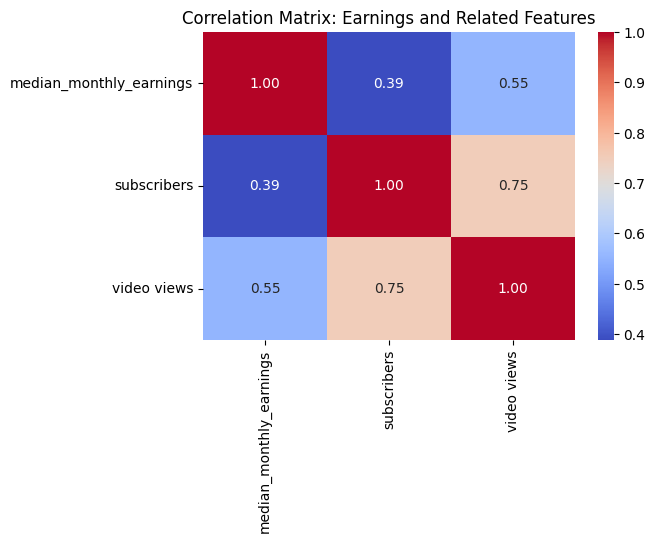

In [ ]:
# Plotting correlation matrix for earnings and related features
plt.figure(figsize = (6, 4))
sns.heatmap(correlation_earnings, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix: Earnings and Related Features')
plt.show()

##### Observations from the Correlation Matrix
- Subscribers and Video Views: A strong positive correlation (0.75) indicates that channels with more subscribers tend to have higher video views.
- Median Monthly Earnings and Video Views: A moderately positive correlation (0.55) suggests that channels with higher video views tend to have higher mean monthly earnings.

#### Hypothesis Testing
We can perform hypothesis testing to see if there are significant differences in video views based on the category of the channel.

- $H_{0}$: There is no significant difference in video views between different categories.
- $H_{A}$:  There is a significant difference in video views between different categories.

##### Visualization for Hypothesis Testing
We want to create a plot that will help us visualize the distribution of video views across different categories. We will do this using a box plot.

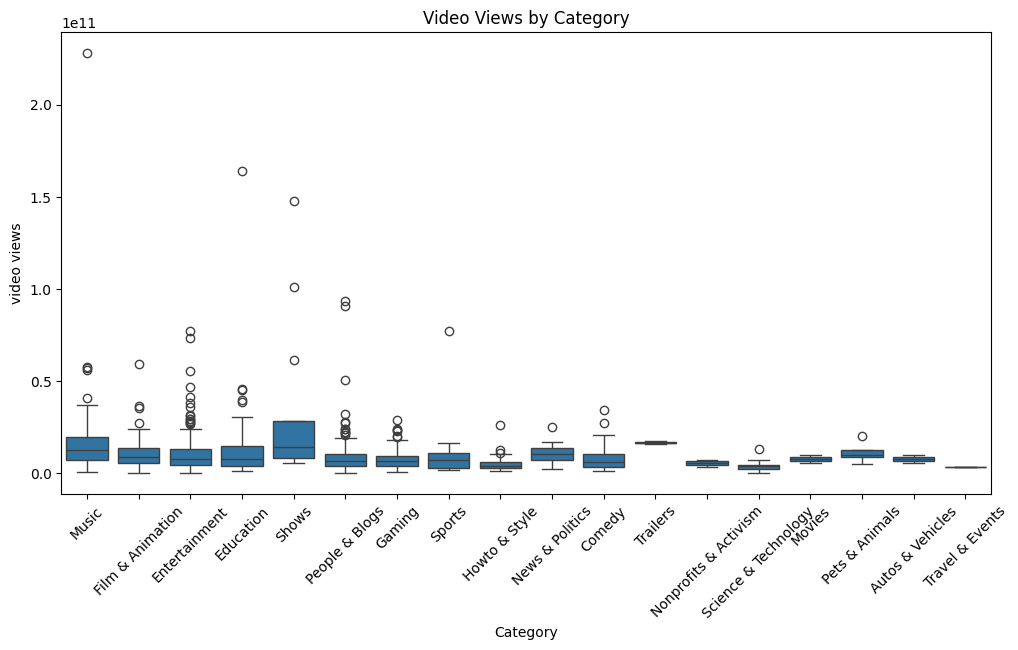

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'category', y ='video views', data = df)
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.title('Video Views by Category')
plt.show()

##### Performing ANOVA Test
To analyze our data, we want to perform an ANOVA test. We will do this by first retrieving unique and non-null categories from our dataset.

In [ ]:
categories = df['category'].dropna().unique()

##### Grouping Video Views by Category
Next, we need to group video views by category. We can do this by creating a list of video views by category.

In [ ]:
views_by_category = [df[df['category'] == category]['video views'].dropna() for category in categories]

##### Calculating the F statistic and P value

In [ ]:
# ANOVA test
f_stat, p_val = f_oneway(*views_by_category)
print(f'F statistic: {f_stat}')
print(f'P value: {p_val}')

F statistic: 5.071718955777486
P value: 1.0740051301004631e-10


##### Observations from ANOVA test
We conducted an ANOVA test to see if there are significant differences in video views based on the category of the channel. The results are as follows:

- F-statistic: 5.09
- p-value: 9.54e-11
- Given the p-value is much smaller than the alpha value of 0.05, we reject the null hypothesis, indicating significant differences in video views between categories.



#### Outlier Detection in Subscribers based on Video Views Using Z-Score
The Z-score method measures how many standard deviations a data point is from the mean. We can use this to detect outliers in the subscribers column based on their relationship with video views.

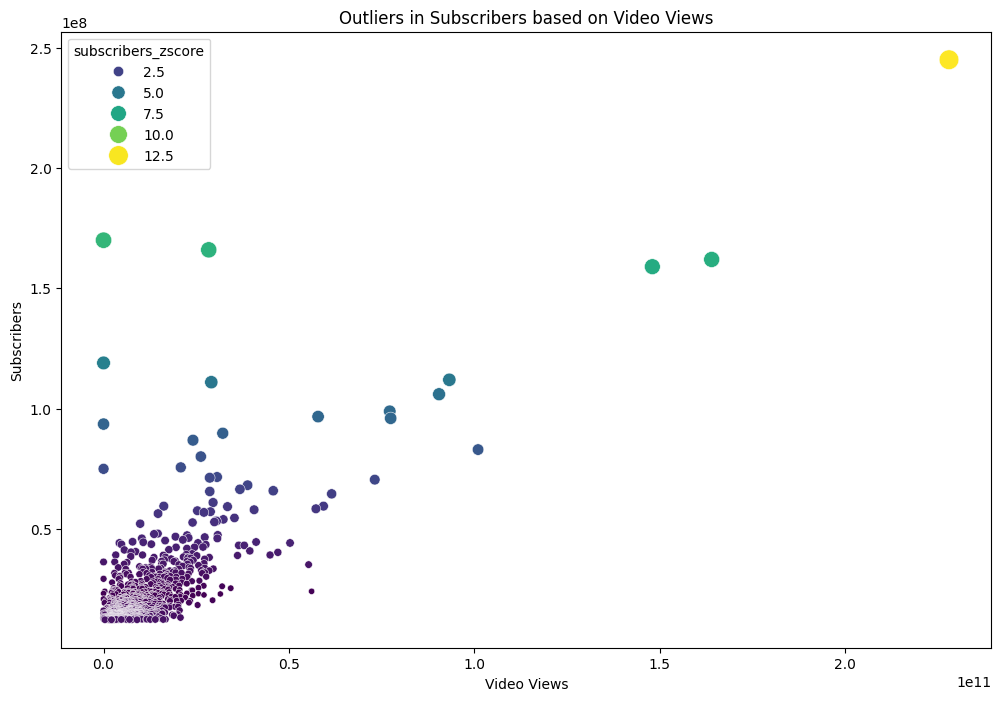

In [ ]:
# Outlier detection using z-score
df['subscribers_zscore'] = np.abs(stats.zscore(df['subscribers']))
outliers = df[df['subscribers_zscore'] >= 3]  # Z-score > 3 means it is an outlier

# Scatter Plot for Outliers in Subscribers based on Video Views
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='video views', y='subscribers', palette='viridis', hue='subscribers_zscore', size='subscribers_zscore', sizes=(20, 200))
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.title('Outliers in Subscribers based on Video Views')
plt.show()

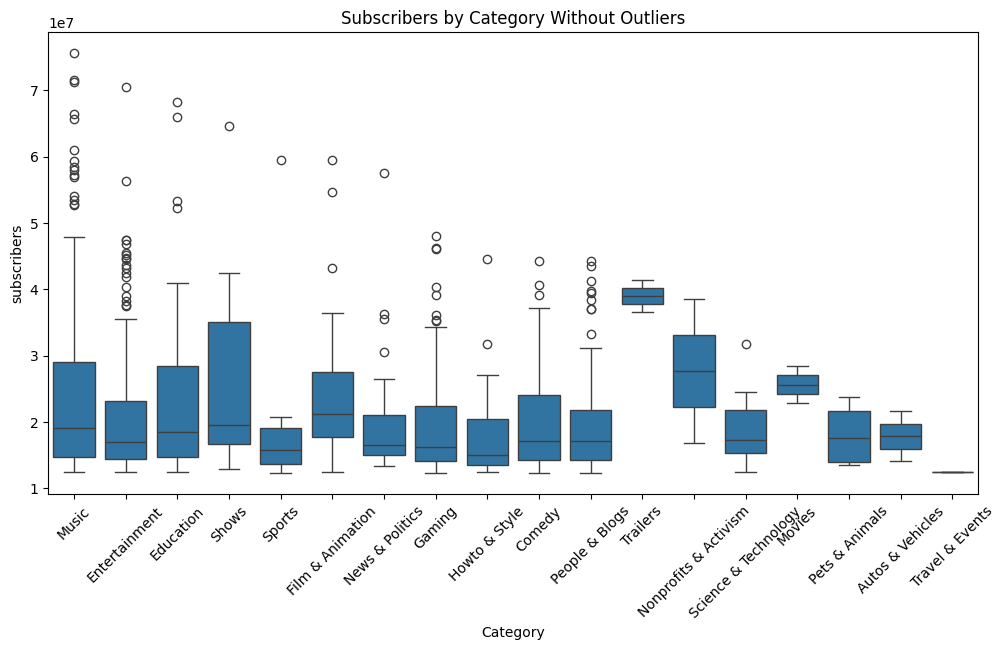

In [ ]:
# Box plot without outliers
data_cleaned = df[df['subscribers_zscore'] <= 3]
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='subscribers', data=data_cleaned)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.title('Subscribers by Category Without Outliers')
plt.show()

##### Observations:
* Adjusting for outliers will still result in data with outliers; however, by setting the z-score threshold = 3, we can remove the most extreme values from the data set.
* Using the plot above we can see that the category with the highest median subscriber count is Trailers.
* The category with the lowest median subscriber count is Travel & Events.

### Primary analysis

#### Nueral Network

In [ ]:
# Define the high_success_threshold_views
high_success_threshold_views = df['video views'].quantile(0.75)

# Create a binary target variable
df['high_success'] = (df['video views'] >= high_success_threshold_views).astype(int)

# Select relevant features
features = ['subscribers', 'uploads', 'category', 'Country', 'Unemployment rate', 'Gross tertiary education enrollment (%)']

# Convert categorical variables to dummy variables
data = pd.get_dummies(df[features + ['high_success']], drop_first=True)

# Split the data into training and testing sets
X = data.drop(columns='high_success')
y = data['high_success']

# Impute missing values (if any)
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target variable to categorical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Define and compile the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
history_nn = nn_model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)
y_pred_classes_nn = np.argmax(y_pred_nn, axis=1)

# Evaluate the model
report_nn = classification_report(y_test, y_pred_classes_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_classes_nn)


Epoch 1/50
20/20 [==============================] - 2s 27ms/step - loss: 0.6775 - accuracy: 0.7172 - val_loss: 0.6044 - val_accuracy: 0.7610
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 0.5330 - accuracy: 0.7615 - val_loss: 0.5618 - val_accuracy: 0.7736
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 0.4649 - accuracy: 0.8041 - val_loss: 0.5277 - val_accuracy: 0.7799
Epoch 4/50
20/20 [==============================] - 0s 13ms/step - loss: 0.4229 - accuracy: 0.8199 - val_loss: 0.5104 - val_accuracy: 0.7799
Epoch 5/50
20/20 [==============================] - 0s 17ms/step - loss: 0.3945 - accuracy: 0.8341 - val_loss: 0.4962 - val_accuracy: 0.7799
Epoch 6/50
20/20 [==============================] - 0s 11ms/step - loss: 0.3751 - accuracy: 0.8404 - val_loss: 0.4864 - val_accuracy: 0.7987
Epoch 7/50
20/20 [==============================] - 0s 11ms/step - loss: 0.3595 - accuracy: 0.8468 - val_loss: 0.4801 - val_accuracy: 0.7987
Epoch 8/50
20

In [ ]:
print(report_nn)
print(conf_matrix_nn)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       145
           1       0.74      0.43      0.55        53

    accuracy                           0.81       198
   macro avg       0.78      0.69      0.71       198
weighted avg       0.80      0.81      0.79       198

[[137   8]
 [ 30  23]]


### Visualization

### Insights and Conclusions